In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('task1_data.csv')
data.head()

,frequency,payment
0,5.00035,197.922
1,5.10001,197.953
2,5.10027,194.836
3,4.96781,189.600
4,4.80171,189.549


In [2]:
import matplotlib.pyplot as plt

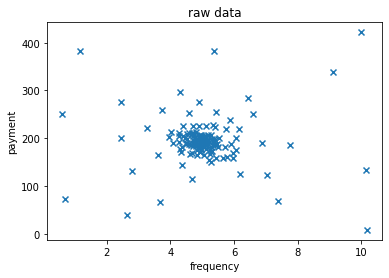

In [5]:
fig = plt.figure()
plt.scatter(data.loc[:,'frequency'],data.loc[:,'payment'],marker='x')
plt.title('raw data')
plt.xlabel('frequency')
plt.ylabel('payment')
plt.show()

In [8]:
#x1 x2 x赋值
X = data
x1 = data.loc[:,'frequency']
x2 = data.loc[:,'payment']
x2.head()

0    197.922
1    197.953
2    194.836
3    189.600
4    189.549
Name: payment, dtype: float64

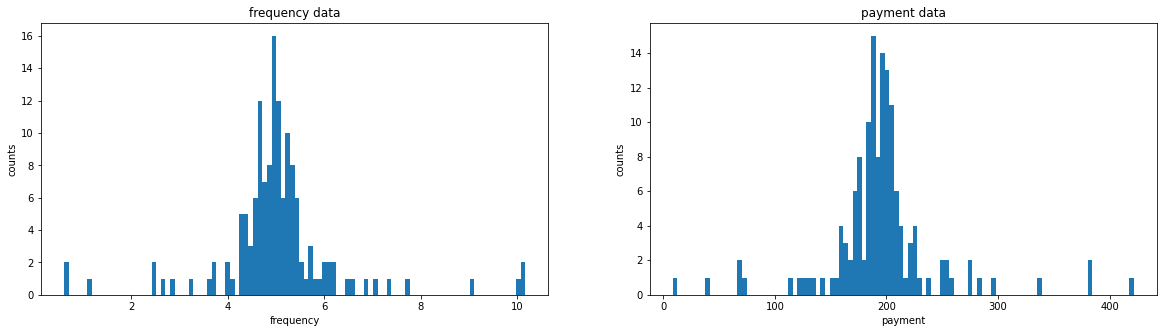

In [12]:
#数据分布的可视化
fig2 = plt.figure(figsize=(20,5))
fig2_1=plt.subplot(121)
plt.hist(x1,bins=100)
plt.title('frequency data')
plt.xlabel('frequency')
plt.ylabel('counts')

fig2_2=plt.subplot(122)
plt.hist(x2,bins=100)
plt.title('payment data')
plt.xlabel('payment')
plt.ylabel('counts')
plt.show()

In [16]:
#计算平均值u和标准差sigma
x1_mean=x1.mean()
x1_sigma=x1.std()
x2_mean=x2.mean()
x2_sigma=x2.std()
print(x1_mean,x1_sigma,x2_mean,x2_sigma)

5.033123443661971 1.2756307632971424 194.815448943662 50.42404624918217


In [23]:
#计算基于高斯分布的概率密度函数
from scipy.stats import norm
x1_range = np.linspace(0,10,300)
x1_normal=norm.pdf(x1_range,x1_mean,x1_sigma)
x2_range = np.linspace(0,400,300)
x2_normal=norm.pdf(x2_range,x2_mean,x2_sigma)

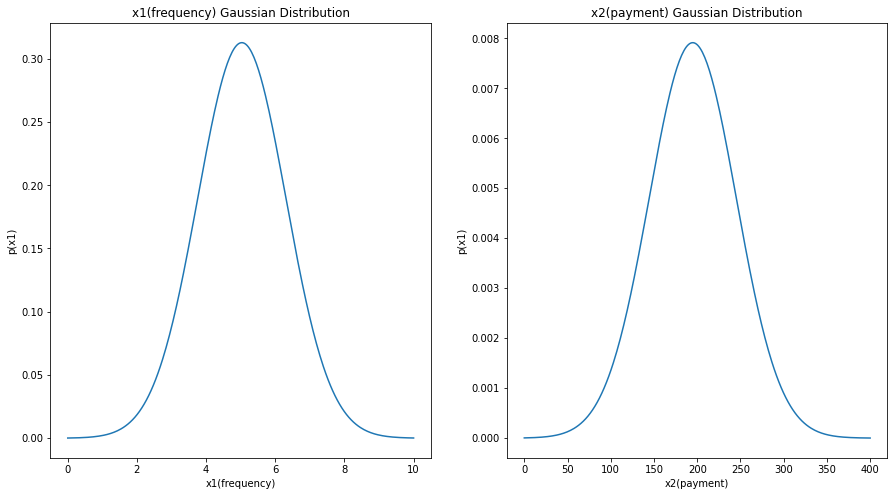

In [28]:
#原始数据的高斯分布概率密度函数可视化
fig3=plt.figure(figsize=(15,8))
fig3_1=plt.subplot(121)
plt.plot(x1_range,x1_normal)
plt.title('x1(frequency) Gaussian Distribution')
plt.xlabel('x1(frequency)')
plt.ylabel('p(x1)')

fig3_2=plt.subplot(122)
plt.plot(x2_range,x2_normal)
plt.title('x2(payment) Gaussian Distribution')
plt.xlabel('x2(payment)')
plt.ylabel('p(x1)')
plt.show()

In [29]:
import math
#设置范围
x_min, x_max = 0, 10
y_min, y_max = 0, 400
h1 = 0.1
h2 = 0.1
#生成矩阵数据
xx, yy = np.meshgrid(np.arange(x_min, x_max, h1), np.arange(y_min, y_max, h2))
print(xx.shape,yy.shape)

#展开矩阵数据
x_range = np.c_[xx.ravel(), yy.ravel()]
x1 = np.c_[xx.ravel()]
x2 = np.c_[yy.ravel()]
x_range_df = pd.DataFrame(x_range)
#x_range_df.to_csv('data.csv')
#高斯分布参数
u1 = x1_mean
u2 = x2_mean
sigma1 = x1_sigma
sigma2 = x2_sigma

#计算高斯分布概率
p1 = 1/sigma1/math.sqrt(2*math.pi)*np.exp(-np.power((x1-u1),2)/2/math.pow(sigma1,2))
p2 = 1/sigma2/math.sqrt(2*math.pi)*np.exp(-np.power((x2-u2),2)/2/math.pow(sigma2,2))
p = np.multiply(p1,p2)
#对概率密度维度转化
p_2d = p.reshape(xx.shape[0],xx.shape[1])

(4000, 100) (4000, 100)


<ipython-input-30-cd02c1a205ad>:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes3d = Axes3D(fig5)


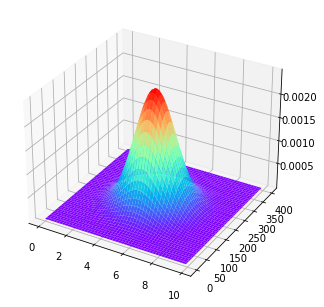

In [30]:
#综合高斯分布的概率密度函数的可视化
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
fig5 = plt.figure()
axes3d = Axes3D(fig5)
axes3d.plot_surface(xx,yy,p_2d,cmap=cm.rainbow)

In [33]:
#建立异常检测模型
from sklearn.covariance import EllipticEnvelope
model = EllipticEnvelope(contamination=0.03)
model.fit(X)


EllipticEnvelope(contamination=0.03)

In [34]:
y_predict = model.predict(X)

In [35]:
print(y_predict)
print(pd.value_counts(y_predict))

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
 1    137
-1      5
dtype: int64


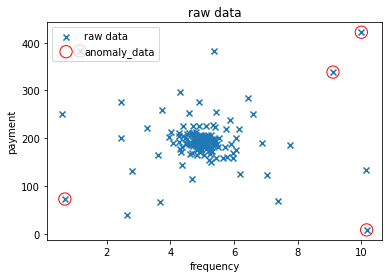

In [42]:
fig6 = plt.figure()
plt.scatter(data.loc[:,'frequency'],data.loc[:,'payment'],marker='x',label='raw data')
plt.scatter(data.loc[:,'frequency'][y_predict==-1],data.loc[:,'payment'][y_predict==-1],marker='o',facecolor='none',edgecolor='red',s=150,label='anomaly_data')
plt.title('raw data')
plt.xlabel('frequency')
plt.ylabel('payment')
plt.legend(loc="upper left")
plt.show()

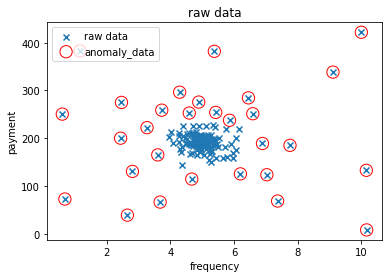

In [43]:
model2 = EllipticEnvelope(contamination=0.2)
model2.fit(X)
y_predict2 = model2.predict(X)
fig7 = plt.figure()
plt.scatter(data.loc[:,'frequency'],data.loc[:,'payment'],marker='x',label='raw data')
plt.scatter(data.loc[:,'frequency'][y_predict2==-1],data.loc[:,'payment'][y_predict2==-1],marker='o',facecolor='none',edgecolor='red',s=150,label='anomaly_data')
plt.title('raw data')
plt.xlabel('frequency')
plt.ylabel('payment')
plt.legend(loc="upper left")
plt.show()

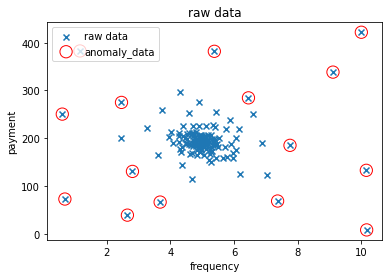

In [44]:
model3 = EllipticEnvelope(contamination=0.1)
model3.fit(X)
y_predict3 = model3.predict(X)
fig7 = plt.figure()
plt.scatter(data.loc[:,'frequency'],data.loc[:,'payment'],marker='x',label='raw data')
plt.scatter(data.loc[:,'frequency'][y_predict3==-1],data.loc[:,'payment'][y_predict3==-1],marker='o',facecolor='none',edgecolor='red',s=150,label='anomaly_data')
plt.title('raw data')
plt.xlabel('frequency')
plt.ylabel('payment')
plt.legend(loc="upper left")
plt.show()